# Task: Lending club loan data - Predict which loans will be paid back
**Kaggle dataset:** https://www.kaggle.com/wendykan/lending-club-loan-data

# Data collection, preprosessing and understanding

In [1]:
import pandas as pd # Data wrangling tool for data ninjas
import numpy as np # Numerical processing e.g. matrix and other algebra magic

In [2]:
loan_data = pd.read_csv('data/lending-club-loan-data/loan.csv', low_memory=False)

In [3]:
# Show me the data!
loan_data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.000000,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.000000,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.000000,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.000000,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.000000,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1075269,1311441,5000.0,5000.0,5000.000000,36 months,7.90,156.46,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1069639,1304742,7000.0,7000.0,7000.000000,60 months,15.96,170.08,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1072053,1288686,3000.0,3000.0,3000.000000,36 months,18.64,109.43,E,E1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1071795,1306957,5600.0,5600.0,5600.000000,60 months,21.28,152.39,F,F2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1071570,1306721,5375.0,5375.0,5350.000000,60 months,12.69,121.45,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Visualisation

In [6]:
loan_data.shape

(887379, 74)

In [4]:
import pylab
import seaborn as sns
%matplotlib inline

pylab.rcParams['figure.figsize'] = [10.0, 12.0]

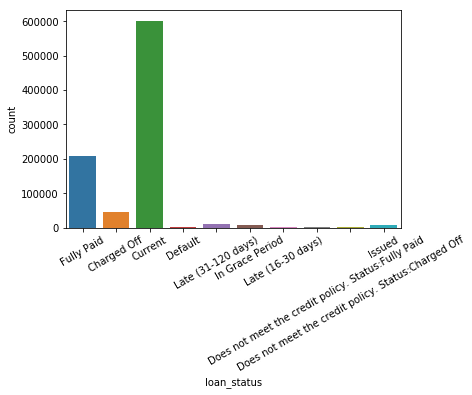

In [5]:
f = sns.countplot(x="loan_status", data=loan_data)
_ = f.set_xticklabels(f.get_xticklabels(), rotation=30)

## Data cleaning/processing

In [7]:
## Lets drop current loans off
old_loans = loan_data[loan_data.loan_status != 'Current']

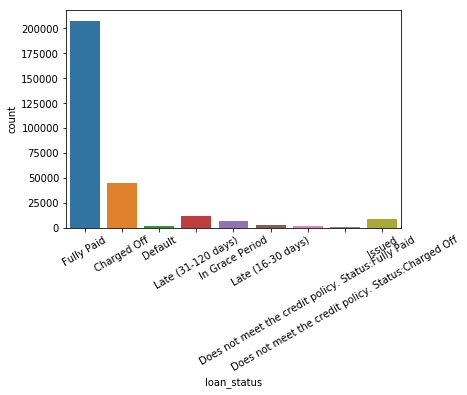

In [8]:
f = sns.countplot(x="loan_status", data=old_loans)
_ = f.set_xticklabels(f.get_xticklabels(), rotation=30)

In [9]:
## Lets drop also items that I don't know what they mean --> cant make actions bases on them
old_loans = old_loans[old_loans.loan_status != 'Does not meet the credit policy. Status:Fully Paid']
old_loans = old_loans[old_loans.loan_status != 'Does not meet the credit policy. Status:Charged Off']
old_loans = old_loans[old_loans.loan_status != 'Issued']
old_loans = old_loans[old_loans.loan_status != 'Default']

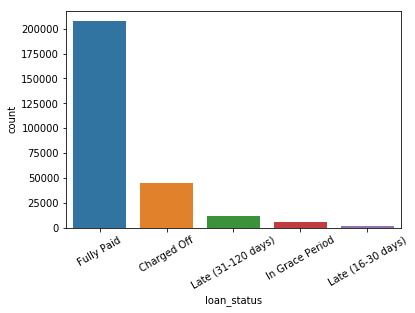

In [10]:
f = sns.countplot(x="loan_status", data=old_loans)
_ = f.set_xticklabels(f.get_xticklabels(), rotation=30)

In [11]:
old_loans.shape

(273172, 74)

In [12]:
# Add target
old_loans['bad_loan'] = old_loans.loan_status != 'Fully Paid'

In [13]:
# Fix empty values
old_loans_fixed = old_loans.fillna(0)

In [14]:
# List all numerical columns
all_numerical_cols = old_loans_fixed.select_dtypes(exclude=['object']).columns.tolist()

In [ ]:
old_loans_fixed[all_numerical_cols[:5] + ['bad_loan']]

# Modeling

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
clf = LogisticRegression()

## Get the data

In [17]:
# We just use blindly all numerical features
X = np.array(old_loans_fixed[all_numerical_cols[:-1]], dtype=float) # Measured values
y = np.array(old_loans_fixed[all_numerical_cols[-1]], dtype=int) # Target

## Train testset split

In [18]:
from sklearn.cross_validation import train_test_split

/Users/tkin/wrk/analytics_weekly/ml-crash-course/mlenv/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Train

In [20]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
clf.coef_

array([[-1.53920820e-08, -1.57834412e-08,  3.78598509e-04,
         5.48796781e-04,  5.60559969e-04, -1.15710408e-06,
         2.41055814e-05, -1.44077991e-05, -2.85870558e-06,
         2.64171741e-08, -8.64762550e-08, -2.15857611e-06,
        -3.79321188e-07, -1.74432483e-06, -1.41437477e-09,
        -9.51687206e-06, -5.49037857e-06, -4.10385624e-06,
         4.52383972e-04,  4.52092193e-04, -3.27125580e-04,
        -2.88399915e-04, -1.03539152e-03,  5.12551201e-04,
         2.83146431e-06,  1.92883246e-04,  2.51108646e-05,
        -1.25074027e-03,  1.15132963e-09,  3.94231891e-07,
        -2.73406357e-07,  2.82473345e-07,  6.42944878e-11,
         4.28257995e-10, -8.46842429e-06,  1.36181820e-06,
         8.09607802e-10,  9.77080809e-10,  6.08834765e-10,
         1.02746419e-09,  9.23255744e-09,  1.99881505e-05,
         2.67469854e-08,  3.33110893e-10,  9.59254139e-10,
         1.21186452e-06,  2.59387526e-08,  5.20938141e-06,
         5.38568527e-10,  1.21403923e-09,  1.23100672e-0

## Evaluate

In [22]:
from sklearn.metrics import recall_score, precision_score, classification_report, accuracy_score, confusion_matrix

In [23]:
print(classification_report(clf.predict(X_test), y_test))

             precision    recall  f1-score   support

          0       1.00      0.99      1.00     68881
          1       0.98      1.00      0.99     21266

avg / total       0.99      0.99      0.99     90147



In [24]:
confusion_matrix(clf.predict(X_test), y_test)

array([[68337,   544],
       [   38, 21228]])

## Study the model

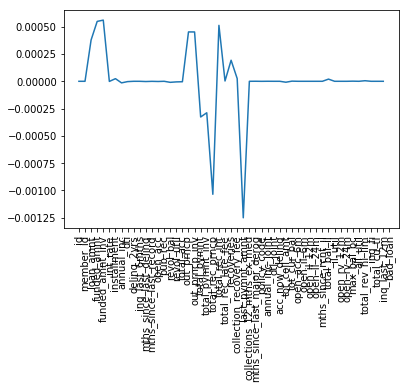

In [25]:
f = pylab.plot(clf.coef_.transpose())
_ = pylab.xticks(range(0, len(all_numerical_cols)), all_numerical_cols, rotation='vertical')

## Visualise all features

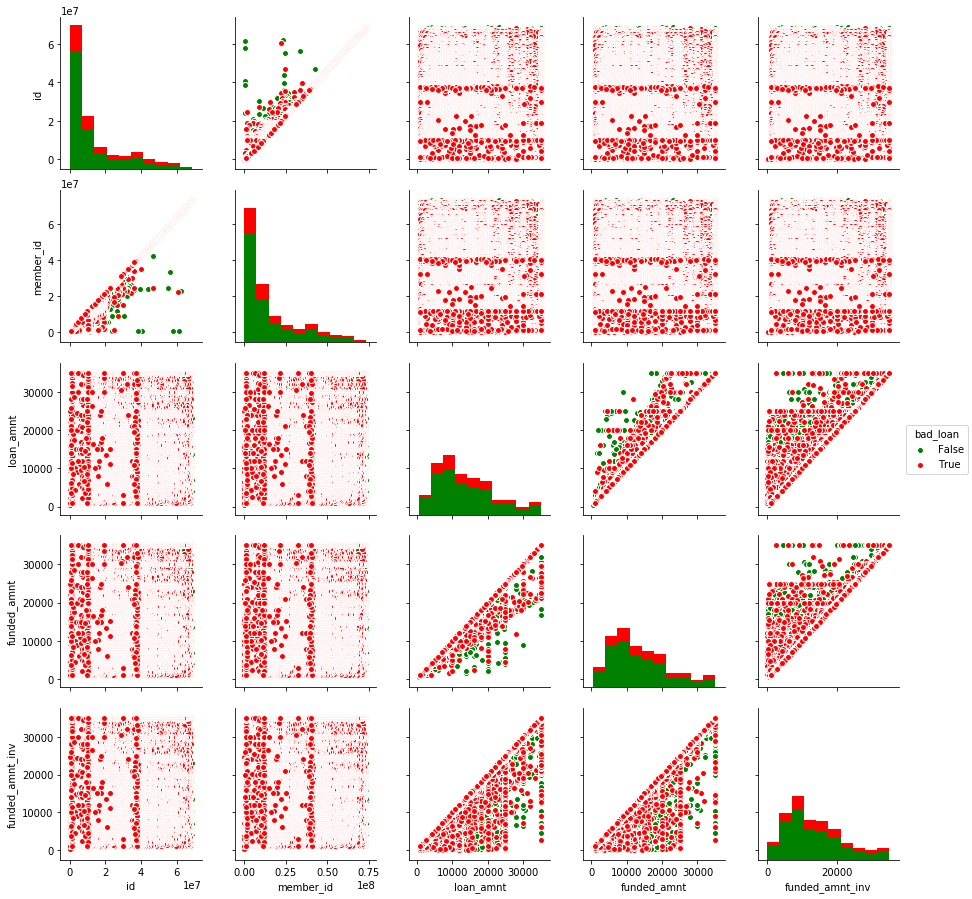

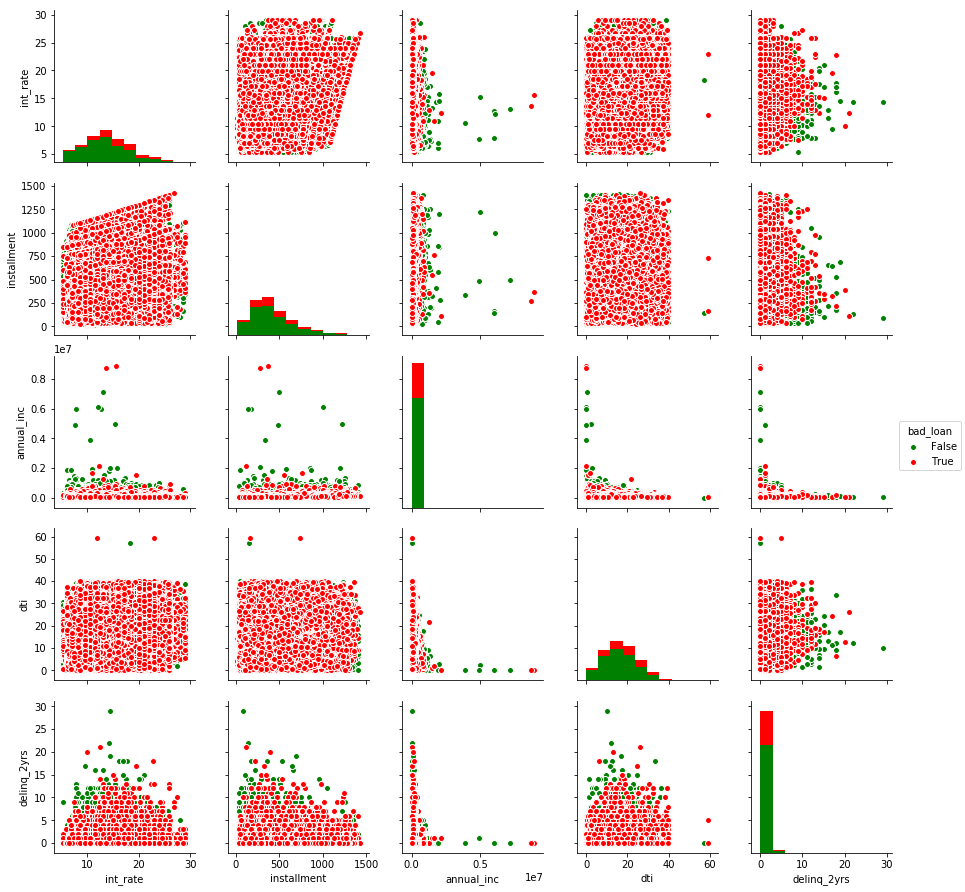

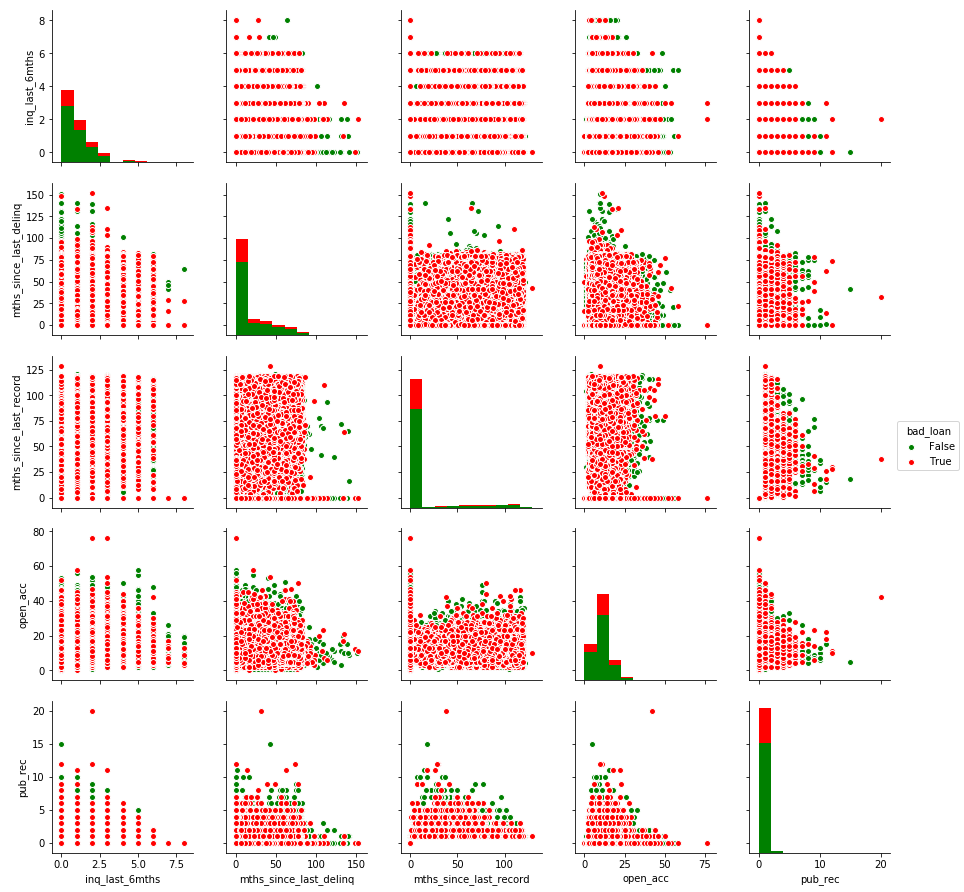

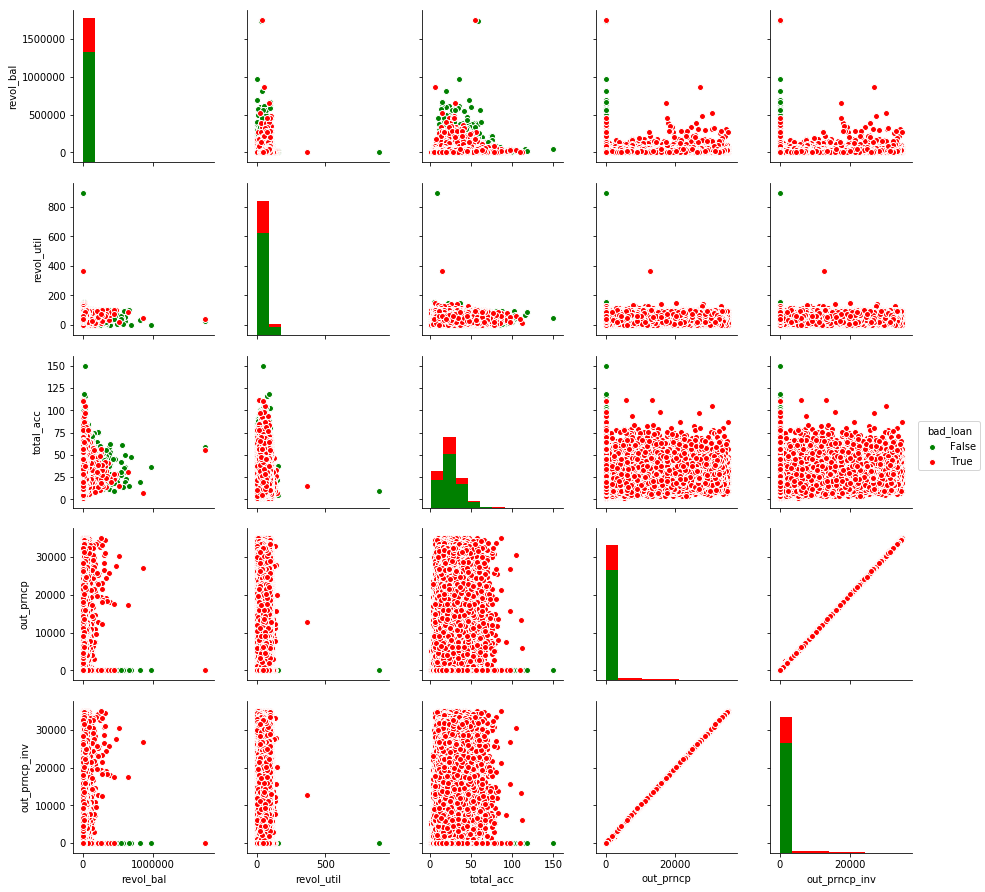

In [26]:
n = 20 #len(all_numerical_cols)-1
for i in range(0, n, 5):
    pylab.figure()
    sns.pairplot(old_loans_fixed,
                 hue='bad_loan',
                 palette={True: 'r', False: 'g'},
                 vars=all_numerical_cols[i:min(i+5, n)])